## Importing Required Modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

## Extracting the dataset

In [31]:
file = "C://unsuperwised_learning//dataset_csv.csv"
df = pd.read_csv(file)
df.head()

,Name,I1,I2,I3,I4,I5
0,Alexis,Acrobatics,Animation,Aquascaping,Bowling,Beatboxing
1,Kathryn,Baton twirling,Aquascaping,Book restoration,Calligraphy,Acting
2,Rachel,Baton twirling,Building,Animation,Brazilian jiu-jitsu,Candle making
3,Michelle,Beatboxing,Book discussion clubs,3D printing,Cabaret,Blogging
4,Ricardo,Acting,Breadmaking,Blogging,Acrobatics,3D printing


## Tokenizing the matrix

In [32]:
diction = {"3D printing":1,
           "Acrobatics":2, 
"Acting":3,     
"Animation":4,  
"Aquascaping":5,
"Astronomy":6  ,
"Baking":7,
"Baton twirling":8,
"Beatboxing":9,
"Blogging":10,
"Building":11,
"Board/tabletop games":12,
"Book discussion clubs":13,
"Book restoration":14,
"Bowling":15,
"Calligraphy":16,
"Brazilian jiu-jitsu":17,
"Candle making":18,
"Cabaret":19,
"Breadmaking":20
}

In [35]:
list_ = ["3D printing",
"Acrobatics" ,
"Acting    " ,
"Animation  ",
"Aquascaping",
"Astronomy  ",
"Baking",
"Calligraphy",
"Baton twirling",
"Beatboxing",
"Blogging",
"Building",
"Board/tabletop games",
"Book discussion clubs",
"Book restoration",
"Bowling",
"Brazilian jiu-jitsu",
"Candle making",
"Cabaret",
"Breadmaking"
]
train_data , test_data = train_test_split(df,test_size=0.2,random_state=0)
zeros = np.zeros((100,21))

## Putting Flag of One at the Interest Position among the total given Interests

In [107]:
cf = train_data.drop("Name",axis=1)
for index,row in cf.iterrows():
    for each in row:
        zeros[index][diction[each]]=1
print(zeros)


[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]


## Tokenizing the Name field

In [37]:
tokenizer  =  Tokenizer()
tokenizer.fit_on_texts(train_data["Name"].values)
tokenize_seq = tokenizer.texts_to_sequences(df["Name"])
#tokenize_seq = tokenize_seq.flatten()
m=[]
for x in tokenize_seq:
    for y in x:
        m.append(y)

print(m)


[36, 1, 35, 13, 29, 1, 4, 67, 40, 37, 63, 48, 30, 31, 57, 32, 23, 50, 2, 66, 39, 56, 5, 7, 51, 41, 46, 9, 2, 38, 3, 57, 34, 60, 33, 28, 27, 11, 10, 3, 59, 10, 15, 52, 8, 22, 9, 7, 24, 43, 62, 35, 18, 26, 12, 25, 69, 61, 42, 68, 21, 53, 6, 14, 2, 7, 5, 17, 55, 44, 19, 58, 16, 7, 47, 45, 65, 64, 49, 20, 6, 54, 4, 9, 8, 1]


## Concatenating Integer Encoded Name Field with Normalised Field of Interests

In [99]:
#df.iloc[0:100,1:5] = 

new = pd.DataFrame(zeros)

#dft =  pd.DataFrame(df["Name"])
#hey = pd.concat([dft,new])
#print(hey)

standardscaler = StandardScaler()
X_scaled = standardscaler.fit_transform(new)
X_normalised = normalize(X_scaled)

X_normalised = pd.DataFrame(X_normalised,dtype="float32")
dft  = pd.DataFrame(m,dtype="float32")

#print(dft)
#print(X_normalised)

new_dataframe = pd.concat([X_normalised,dft]) 

#new_dataframe.fillna("median")
#new_dataframe.drop(0,axis=1)
#print(new_dataframe)

new_dataframe = new_dataframe.dropna()
print(new_dataframe)

     0         1         2         3         4         5         6         7   \
0   0.0 -0.097143  0.474288 -0.117313  0.416324  0.392744 -0.093680 -0.120622   
1   0.0 -0.086168 -0.086168  0.348369 -0.098164  0.348369 -0.083096 -0.106993   
2   0.0 -0.200430 -0.200430 -0.242045 -0.228336 -0.242045 -0.193285 -0.248872   
3   0.0  0.460823 -0.094385 -0.113983 -0.107527 -0.113983 -0.091021 -0.117198   
4   0.0  0.439907  0.439907  0.364274 -0.102646 -0.108809 -0.086889 -0.111878   
5   0.0 -0.097143  0.474288 -0.117313  0.416324  0.392744 -0.093680 -0.120622   
6   0.0 -0.099288 -0.099288 -0.119903 -0.113112  0.401415 -0.095749 -0.123285   
7   0.0 -0.200430 -0.200430 -0.242045 -0.228336 -0.242045 -0.193285 -0.248872   
8   0.0 -0.200430 -0.200430 -0.242045 -0.228336 -0.242045 -0.193285 -0.248872   
9   0.0 -0.093898 -0.093898 -0.113394 -0.106971 -0.113394  0.475392  0.369210   
10  0.0 -0.098408 -0.098408 -0.118840 -0.112109  0.397857 -0.094900 -0.122193   
11  0.0 -0.098938 -0.098938 

## Applying DBSCAN  Model

In [180]:
db_default = DBSCAN(eps = 0.98, min_samples = 4).fit(new_dataframe) 
labels = db_default.labels_
print(labels)

[-1  2  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1 -1  1  0
 -1  2 -1 -1 -1 -1  1  2 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
  0  1 -1  2  0  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  2 -1  0 -1 -1 -1 -1  2
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2 -1 -1 -1 -1 -1
 -1  1 -1 -1]


## Plotting the Resulting Clusters 

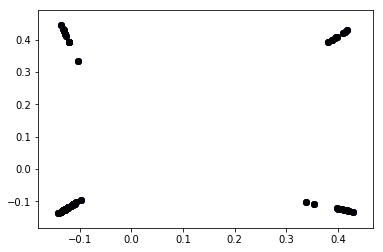

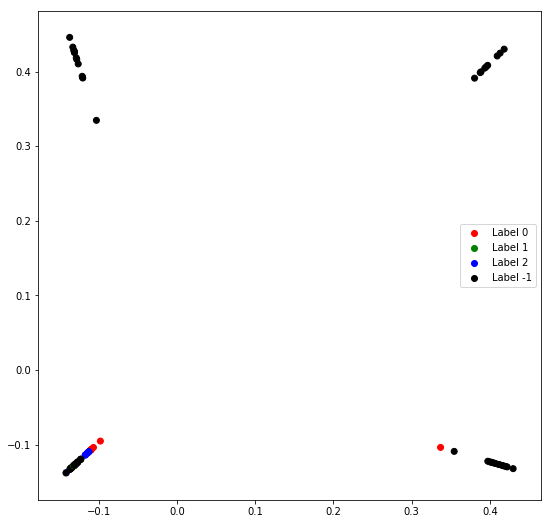

In [181]:
%matplotlib inline 
import matplotlib.pyplot as plt
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_normalised[1], X_normalised[2], color ='r'); 
g = plt.scatter(X_normalised[1], X_normalised[2], color ='g'); 
b = plt.scatter(X_normalised[1], X_normalised[2], color ='b'); 
k = plt.scatter(X_normalised[1], X_normalised[2], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter((X_normalised[1]), (X_normalised[2]), c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 

In [108]:
test_data

,Name,I1,I2,I3,I4,I5
26,Barbara,Animation,Astronomy,Baton twirling,Building,Baking
86,Karen,Book discussion clubs,Baking,Board/tabletop games,Astronomy,3D printing
2,Rachel,Baton twirling,Building,Animation,Brazilian jiu-jitsu,Candle making
55,Melissa,Acrobatics,Book discussion clubs,3D printing,Blogging,Bowling
75,Jay,Beatboxing,Board/tabletop games,Baking,Blogging,Baton twirling
93,Bradley,Aquascaping,Breadmaking,3D printing,Baking,Acrobatics
16,Heather,Astronomy,Animation,Breadmaking,Book discussion clubs,Blogging
73,Jonathan,Bowling,Book restoration,Breadmaking,Acrobatics,Candle making
54,Jonathan,3D printing,Breadmaking,Building,Brazilian jiu-jitsu,Beatboxing
95,Ryan,Baking,Bowling,Book discussion clubs,Acrobatics,3D printing


In [109]:
cf = test_data.drop("Name",axis=1)
for index,row in cf.iterrows():
    for each in row:
        zeros[index][diction[each]]=1
print(zeros)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]


In [111]:
tokenizer  =  Tokenizer()
tokenizer.fit_on_texts(test_data["Name"].values)
tokenize_seq = tokenizer.texts_to_sequences(test_data["Name"])
#tokenize_seq = tokenize_seq.flatten()
m=[]
for x in tokenize_seq:
    for y in x:
        m.append(y)

print(m)


[3, 4, 5, 6, 7, 8, 9, 1, 1, 10, 2, 11, 12, 13, 14, 2, 15, 16, 17, 18]


In [112]:
#df.iloc[0:100,1:5] = 

new = pd.DataFrame(zeros)

#dft =  pd.DataFrame(df["Name"])
#hey = pd.concat([dft,new])
#print(hey)

standardscaler = StandardScaler()
X_scaled = standardscaler.fit_transform(new)
X_normalised = normalize(X_scaled)

X_normalised = pd.DataFrame(X_normalised,dtype="float32")
dft  = pd.DataFrame(m,dtype="float32")

#print(dft)
#print(X_normalised)

new_dataframe = pd.concat([X_normalised,dft]) 

#new_dataframe.fillna("median")
#new_dataframe.drop(0,axis=1)
#print(new_dataframe)

new_dataframe = new_dataframe.dropna()
print(new_dataframe)

     0         1         2         3         4         5         6         7   \
0   0.0 -0.130765  0.425769 -0.137932  0.392574  0.392574 -0.134348 -0.163310   
1   0.0 -0.109969 -0.106953  0.330143 -0.115996  0.330143 -0.112983 -0.137338   
2   0.0 -0.109090 -0.106097 -0.115068  0.327502 -0.115068 -0.112079 -0.136240   
3   0.0  0.407173 -0.125054 -0.135628 -0.135628 -0.135628 -0.132104 -0.160582   
4   0.0  0.387619  0.398553  0.367480 -0.129114 -0.129114 -0.125760 -0.152871   
5   0.0 -0.130765  0.425769 -0.137932  0.392574  0.392574 -0.134348 -0.163310   
6   0.0 -0.136156 -0.132421 -0.143618 -0.143618  0.408760 -0.139887 -0.170043   
7   0.0 -0.135782 -0.132057 -0.143223 -0.143223  0.407636 -0.139503  0.344289   
8   0.0  0.397127  0.408329 -0.132282 -0.132282 -0.132282 -0.128845 -0.156620   
9   0.0 -0.130663 -0.127079 -0.137824 -0.137824 -0.137824  0.402731  0.331310   
10  0.0 -0.132228 -0.128601 -0.139475 -0.139475  0.396966 -0.135851 -0.165137   
11  0.0 -0.134631 -0.130938 

In [211]:
db_default = DBSCAN(eps = 0.98, min_samples = 4).fit(new_dataframe) 
labels = db_default.labels_


100
20
     0         1         2         3         4         5         6         7   \
2   0.0 -0.109090 -0.106097 -0.115068  0.327502 -0.115068 -0.112079 -0.136240   
19  0.0 -0.109342 -0.106342 -0.115334 -0.115334 -0.115334  0.337014 -0.136555   
23  0.0  0.336944 -0.103485 -0.112235 -0.112235 -0.112235 -0.109319 -0.132885   
48  0.0 -0.110597 -0.107563 -0.116658 -0.116658 -0.116658 -0.113627 -0.138122   
52  0.0 -0.097689 -0.095009 -0.103043 -0.103043  0.293276 -0.100366 -0.122002   
61  0.0 -0.110037 -0.107019 -0.116068 -0.116068 -0.116068 -0.113052 -0.137423   
66  0.0 -0.106517 -0.103595 -0.112355  0.319779 -0.112355 -0.109436 -0.133027   

          8         9     ...           11        12        13        14  \
2   0.319201 -0.136240    ...     0.276609 -0.112079 -0.130119 -0.106097   
19 -0.118333 -0.136555    ...     0.277247 -0.112338 -0.130420 -0.106342   
23  0.311341 -0.132885    ...    -0.132885  0.327958  0.282488 -0.103485   
48  0.323611  0.280430    ...    -0.1381

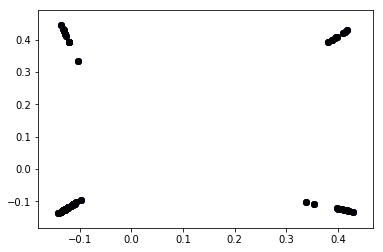

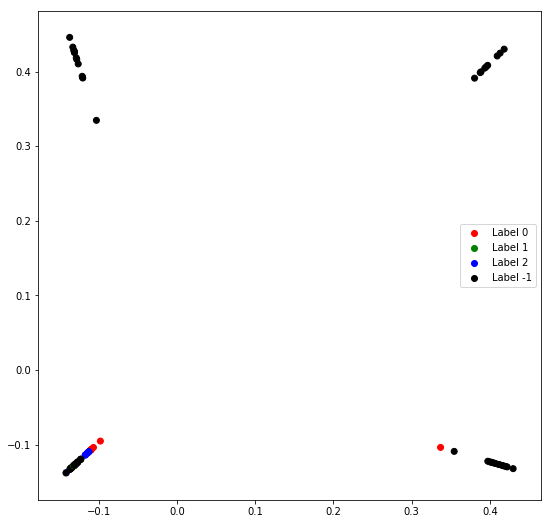

In [163]:
%matplotlib inline 
import matplotlib.pyplot as plt
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_normalised[1], X_normalised[2], color ='r'); 
g = plt.scatter(X_normalised[1], X_normalised[2], color ='g'); 
b = plt.scatter(X_normalised[1], X_normalised[2], color ='b'); 
k = plt.scatter(X_normalised[1], X_normalised[2], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter((X_normalised[1]), (X_normalised[2]), c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 

In [183]:
l1 =[]
l2 =[]
l3 =[]
l4 =[]
for each in labels:
    if each ==0:
        l1.append(each)
    if each ==1:
        l2.append(each)
    if each ==2:
        l3.append(each)
    if each==-1:
        l4.append(each)

In [195]:
df1 = pd.DataFrame(columns =["Name","l1","l2","l3","l4"]) 

In [200]:
df1
l1

[0, 0, 0, 0, 0, 0, 0]

In [ ]:
df1 = pd.DataFrame(df[labels==0].iloc[:,:])
df1["Label"] = 1


In [285]:
from sklearn.tree import DecisionTreeClassifier

#features = 
#model.fit(df1,)
print(df1)
df2 = pd.DataFrame(df[labels==1].iloc[:,:])
print(df2)
df2["Label"] =2

         Name                     I1                   I2  \
2     Rachel          Baton twirling             Building   
19      Mike               Astronomy              Bowling   
23  Kimberly   Book discussion clubs          3D printing   
48  Jeremiah     Brazilian jiu-jitsu           Beatboxing   
52   Timothy             Aquascaping  Brazilian jiu-jitsu   
61   Kenneth                 Bowling  Brazilian jiu-jitsu   
66   Clayton                 Bowling            Animation   

                       I3                    I4             I5  Label  
2               Animation   Brazilian jiu-jitsu  Candle making      1  
19    Brazilian jiu-jitsu              Building  Candle making      1  
23         Baton twirling  Board/tabletop games  Candle making      1  
48  Book discussion clubs        Baton twirling  Candle making      1  
52               Building           Calligraphy  Candle making      1  
61               Blogging            Beatboxing  Candle making      1  
66     

In [286]:
df3 = pd.DataFrame(df[labels==2].iloc[:,:])
df3["Label"] =3
df3

,Name,I1,I2,I3,I4,I5,Label
1,Kathryn,Baton twirling,Aquascaping,Book restoration,Calligraphy,Acting,3
25,Diana,Brazilian jiu-jitsu,Beatboxing,Building,Baking,Acting,3
31,Carrie,Astronomy,Beatboxing,Building,Calligraphy,Baking,3
51,Hailey,Baking,Brazilian jiu-jitsu,Cabaret,Book discussion clubs,Calligraphy,3
64,Caleb,Acting,Building,Brazilian jiu-jitsu,Beatboxing,Calligraphy,3
71,Joseph,Beatboxing,Animation,Cabaret,Baking,Calligraphy,3
89,Meghan,Acting,Baking,Baton twirling,Brazilian jiu-jitsu,Calligraphy,3
90,Lisa,Book restoration,Beatboxing,Animation,Calligraphy,Baking,3


In [287]:
df4  = pd.DataFrame(df[labels==1].iloc[:,:])
df4["Label"] = 4
df4

,Name,I1,I2,I3,I4,I5,Label
15,Julia Carter,Book restoration,Blogging,Book discussion clubs,Building,Astronomy,4
22,James,Book discussion clubs,Astronomy,Baton twirling,Baking,Blogging,4
30,Troy,Acting,Baton twirling,Astronomy,Book discussion clubs,Building,4
33,Timothy,Building,Aquascaping,Book discussion clubs,Astronomy,Book restoration,4
39,Steven,Book discussion clubs,Building,Baton twirling,Astronomy,Breadmaking,4
49,Elizabeth,Baton twirling,Astronomy,Blogging,Building,Book discussion clubs,4
53,Troy,Acting,Baton twirling,Astronomy,Book discussion clubs,Animation,4
97,Timothy,Book discussion clubs,Book restoration,Baking,Astronomy,Blogging,4


In [350]:
D  = pd.concat([df1,df2,df3,df4])

In [351]:
D

,Name,I1,I2,I3,I4,I5,Label
2,Rachel,Baton twirling,Building,Animation,Brazilian jiu-jitsu,Candle making,1
19,Mike,Astronomy,Bowling,Brazilian jiu-jitsu,Building,Candle making,1
23,Kimberly,Book discussion clubs,3D printing,Baton twirling,Board/tabletop games,Candle making,1
48,Jeremiah,Brazilian jiu-jitsu,Beatboxing,Book discussion clubs,Baton twirling,Candle making,1
52,Timothy,Aquascaping,Brazilian jiu-jitsu,Building,Calligraphy,Candle making,1
61,Kenneth,Bowling,Brazilian jiu-jitsu,Blogging,Beatboxing,Candle making,1
66,Clayton,Bowling,Animation,Beatboxing,Breadmaking,Candle making,1
15,Julia Carter,Book restoration,Blogging,Book discussion clubs,Building,Astronomy,2
22,James,Book discussion clubs,Astronomy,Baton twirling,Baking,Blogging,2
30,Troy,Acting,Baton twirling,Astronomy,Book discussion clubs,Building,2


In [352]:
D.shape

(31, 7)

In [377]:
#df.iloc[0:100,1:5] = 
from sklearn.preprocessing import OneHotEncoder
#zeros =np.zeros((31,5))


from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
D["Name"] = lb_make.fit_transform(D["Name"])



lb_make = LabelEncoder()
D["I1"] = lb_make.fit_transform(D["I1"])


lb_make = LabelEncoder()
D["I2"] = lb_make.fit_transform(D["I2"])


lb_make = LabelEncoder()
D["I4"] = lb_make.fit_transform(D["I4"])



lb_make = LabelEncoder()
D["I3"] = lb_make.fit_transform(D["I3"])



lb_make = LabelEncoder()
D["I5"] = lb_make.fit_transform(D["I5"])




In [367]:
from sklearn.linear_model import LinearRegression
features = D["Name"]
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

labels_list = ["I1","I2","I3","I4","I5"]
labels = D[labels_list]
list_ = ["Name","I1","I2","I3","I4","I5"]

train_X , test_X,train_Y,test_Y = train_test_split(features,labels,test_size=0.2,random_state=42)
#D = D["Name"].values.reshape(-1,1)

#print(D)
model = RandomForestClassifier()
model.fit(train_Y,train_X)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [376]:
x=model.predict(test_Y)
print(test_X)
print(x)
from sklearn.metrics import mean_absolute_error
#odel.evaluate(train_Y,test_Y)


39    17
1     10
15     9
31     1
22     6
30    20
53    20
Name: Name, dtype: int64
[17  9  9  9  6 20 20]


In [369]:
D

,Name,I1,I2,I3,I4,I5,Label
2,16,4,11,0,6,10,1
19,15,2,9,8,8,10,1
23,12,6,0,3,4,10,1
48,7,9,6,6,2,10,1
52,19,1,10,9,9,10,1
61,11,8,10,5,3,10,1
66,2,8,1,4,7,10,1
15,9,7,7,6,8,2,2
22,6,6,3,3,1,4,2
30,20,0,5,1,5,8,2
